### 演習2）配布したSMILES形式の化学構造をMOLオブジェクトという形式に変換し，化学構造を描画せよ．

必要なパッケージ

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw


データを導入

In [2]:
# set file directory
dir_file = 'data/Book_data_MD.csv'
# load csv data using pandas DataFrame
data = pd.read_csv(dir_file)


データの確認：1列目に分子SMILESを格納し、次に4列のプロパティデータを格納する。

In [3]:
print(data)

                                                SMILES  thermal_conductivity  \
0                                         *C(C*)OCCCCC              0.238333   
1                                 *C(C*)c1c(cccc1Cl)Cl              0.106015   
2                         *C(C*)OC(=O)C(CC(C)(C)C)(C)C              0.160536   
3                             *C(C*)c1ccc(cc1)C(=O)CCC              0.212112   
4    *Oc1ccc(cc1)C(c1ccc(cc1)OC(=O)c1ccc(cc1)C(=O)*...              0.255520   
..                                                 ...                   ...   
295                             *C(C*)c1ccc(cc1)C(CC)C              0.195530   
296                         *C(C*)c1c(cccc1)C(=O)N(C)C              0.160694   
297                            *C1C(=O)OC(=O)C1C(C*)OC              0.157722   
298                   *C(C*)C(=O)OC1C2(CCC(C1)C2(C)C)C              0.150222   
299  *c1cccc(Oc2ccc(N3C(=O)c4ccc(-c5ccc6c(c5)C(=O)N...              0.200290   

      density        Cp  linear_expansi

データの最初の分子を描く

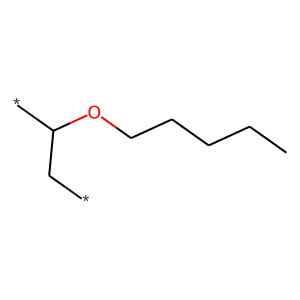

In [4]:
# convert first SMILES to Mol format in RDKit
smi = data['SMILES'][0]
mol = Chem.MolFromSmiles(smi)
# Draw molecule
Draw.MolToImage(mol)


ランダムに20個の分子を描画し、PNGファイルに保存する。

[実行には数秒かかります]

In [5]:
%%time

# randomly pick 20 molecules from data
np.random.seed(202202) # fix a random seed for reproducibility
smis = data['SMILES'].sample(20)

# set directory to save the PNG file
dir_save = 'output/演習2'
# create the folder if it does not exist
os.makedirs(dir_save, exist_ok=True)

# set number of rows and columns in the image (i.e., total number of molecules)
n_Row, n_Col = 4, 5
n_S = n_Col*n_Row

# set up figure
fig, ax = plt.subplots(n_Row, n_Col)
_ = fig.set_size_inches(30, 30)
_ = fig.set_tight_layout(True)
# draw each molecule one-by-one
for j, (idx, smi) in enumerate(smis.iteritems()):
    xaxis = j // n_Col
    yaxis = j % n_Col
    # if fail to draw, leave the space blank
    try:
        img = Draw.MolToImage(Chem.MolFromSmiles(smi), size=(500, 500))
        _ = ax[xaxis, yaxis].clear()
        _ = ax[xaxis, yaxis].set_frame_on(False)
        _ = ax[xaxis, yaxis].imshow(img)
        _ = ax[xaxis, yaxis].text(1,10,f'Data index: {idx}', fontsize=32)
    except:
        pass
    _ = ax[xaxis, yaxis].set_axis_off()
_ = fig.savefig(f'{dir_save}/molecules.png',dpi = 500)
_ = plt.close()


CPU times: user 8.08 s, sys: 350 ms, total: 8.43 s
Wall time: 8.45 s


### 演習3）例題の化学構造の内，GetSubstructMatchを用いてベンゼン’c1ccccc1’にマッチする原子のインデックスを取得し，RDKitのモジュールを使用して，ベンゼンをカラーハイライトして化学構造を図示せよ．


RDKitの関数を使って、部分構造を強調した2番目の分子をJupyterで直接描画する。

In [6]:
# import the special module
from rdkit.Chem.Draw import IPythonConsole


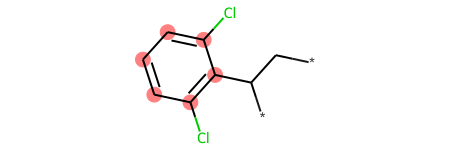

In [7]:
# convert second SMILES to Mol format in RDKit
smi = data['SMILES'][1]
mol = Chem.MolFromSmiles(smi)
# convert substructure SMILES to Mol format
sub_mol = Chem.MolFromSmiles('c1ccccc1')
# search for substructure
mol.GetSubstructMatch(sub_mol)
# directly show the results in Jupyter notebook
mol


5番目の分子の部分構造を抽出する。

注意：すべての部分構造が必要な場合は、別の関数が使われる!

In [8]:
# convert second SMILES to Mol format in RDKit
smi = data['SMILES'][4]
mol = Chem.MolFromSmiles(smi)
# convert substructure SMILES to Mol format
sub_mol = Chem.MolFromSmiles('c1ccccc1')

# search for any substructure match and return atom indices in mol
sub_atoms = mol.GetSubstructMatch(sub_mol)
print(sub_atoms)

# search for all substructure matches and return atom indices in mol
sub_atoms = mol.GetSubstructMatches(sub_mol)
print(sub_atoms)


(2, 3, 4, 5, 6, 7)
((2, 3, 4, 5, 6, 7), (9, 10, 11, 12, 13, 14), (18, 19, 20, 21, 22, 23))


部分構造が強調された分子をランダムに20個描き、PNGファイルに保存する。

[実行には数秒かかる]

In [9]:
%%time

# randomly pick 20 molecules from data
np.random.seed(202202) # fix a random seed for reproducibility
smis = data['SMILES'].sample(20)

# set directory to save the PNG file
dir_save = 'output/演習3'
# create the folder if it does not exist
os.makedirs(dir_save, exist_ok=True)

# set number of rows and columns in the image (i.e., total number of molecules)
n_Row, n_Col = 4, 5
n_S = n_Col*n_Row

# convert substructure SMILES to Mol format
sub_mol = Chem.MolFromSmiles('c1ccccc1')

# set up figure
fig, ax = plt.subplots(n_Row, n_Col)
_ = fig.set_size_inches(30, 30)
_ = fig.set_tight_layout(True)
# draw each molecule one-by-one
for j, (idx, smi) in enumerate(smis.iteritems()):
    xaxis = j // n_Col
    yaxis = j % n_Col
    # if fail to draw, leave the space blank
    try:
        mol = Chem.MolFromSmiles(smi)
        # final all substructure matches
        sub_atoms = mol.GetSubstructMatches(sub_mol)
        # make the atom indices into a single list
        sub_atoms_list = [item for sublist in sub_atoms for item in sublist]
        img = Draw.MolToImage(mol, highlightAtoms=sub_atoms_list, size=(500, 500))
        _ = ax[xaxis, yaxis].clear()
        _ = ax[xaxis, yaxis].set_frame_on(False)
        _ = ax[xaxis, yaxis].imshow(img)
        _ = ax[xaxis, yaxis].text(1,10,f'Data index: {idx}', fontsize=32)
    except:
        pass
    _ = ax[xaxis, yaxis].set_axis_off()
_ = fig.savefig(f'{dir_save}/molecules_highlight.png',dpi = 500)
_ = plt.close()


CPU times: user 7.99 s, sys: 177 ms, total: 8.17 s
Wall time: 8.18 s


### 演習4）アスピリンCC(=O)Oc1ccccc1C(=O)OのECFPフィンガープリント（Morganフィンガープリント）を計算せよ．ビット数をB=2048，半径をR=2とする．

RDKitを使用してECFPを計算する。

注意：全く同じ計算をするモジュールが2つある。

In [10]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors as rdMol

mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O')
fp = rdMol.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# output is in rdkit ExplicitBitVect format 
print(fp)
# output can be converted to list simply using list()
print(list(fp))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O')
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# output is in rdkit ExplicitBitVect format 
print(fp)
# output can be converted to list simply using list()
print(list(fp))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

RDKitをベースにしたXenonPyでECFPを計算する。

In [12]:
from xenonpy.descriptor import ECFP

# set up the function for fingerprint calculation (allow SMILES input directly and return fingerprints as a DataFrame)
fp_fcn = ECFP(radius=2, n_bits=2048, input_type='smiles', return_type='df')

# xenonpy assumes a list-like input
smis_list = ['CC(=O)Oc1ccccc1C(=O)O']

# calculate fingerprint
fp = fp_fcn.transform(smis_list)
print(fp)


   ecfp4:0  ecfp4:1  ecfp4:2  ecfp4:3  ecfp4:4  ecfp4:5  ecfp4:6  ecfp4:7  \
0        0        0        0        0        0        0        0        0   

   ecfp4:8  ecfp4:9  ...  ecfp4:2038  ecfp4:2039  ecfp4:2040  ecfp4:2041  \
0        0        0  ...           0           0           0           0   

   ecfp4:2042  ecfp4:2043  ecfp4:2044  ecfp4:2045  ecfp4:2046  ecfp4:2047  
0           0           0           0           0           0           0  

[1 rows x 2048 columns]


### 演習5）演習4の各ビットの部分構造を取り出し，化学構造を描画せよ．

非ゼロビットの情報を用意する。

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import DrawMorganBits

mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O')

# prepare empty dictionary to store bit info
bit_dict = {}

# calculate ECFP with bit info stored
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bit_dict)
# prepare tuples for plotting
fp_tuples = [(mol, bit, bit_dict) for bit in list(bit_dict.keys())]

# check number of non-zero bits
print(f'Num. of non-zero bits: {len(bit_dict)}')


Num. of non-zero bits: 24


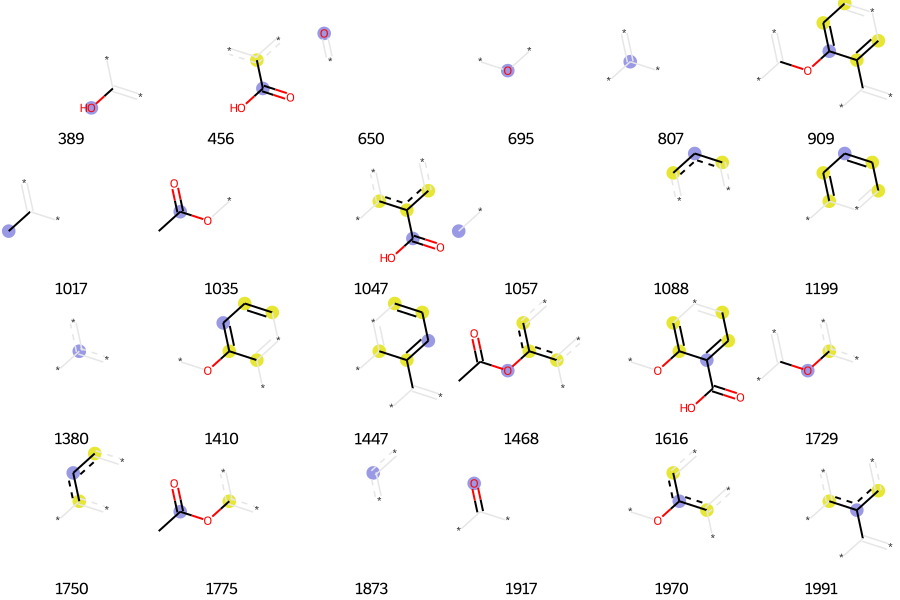

In [14]:
# draw all non-zero bits
label_list = list(map(str, list(bit_dict.keys()))) # convert int to str
DrawMorganBits(fp_tuples, molsPerRow=6, legends=label_list)


フィンガープリントを固定長に折り返さない場合、実際には25個の非ゼロビットがある。すなわち、ビット衝突があったことがわかる。

下の図と上の図を比較すると、下のビット番号864662311が上から欠落していることが分かる。

Num. of non-zero bits: 25


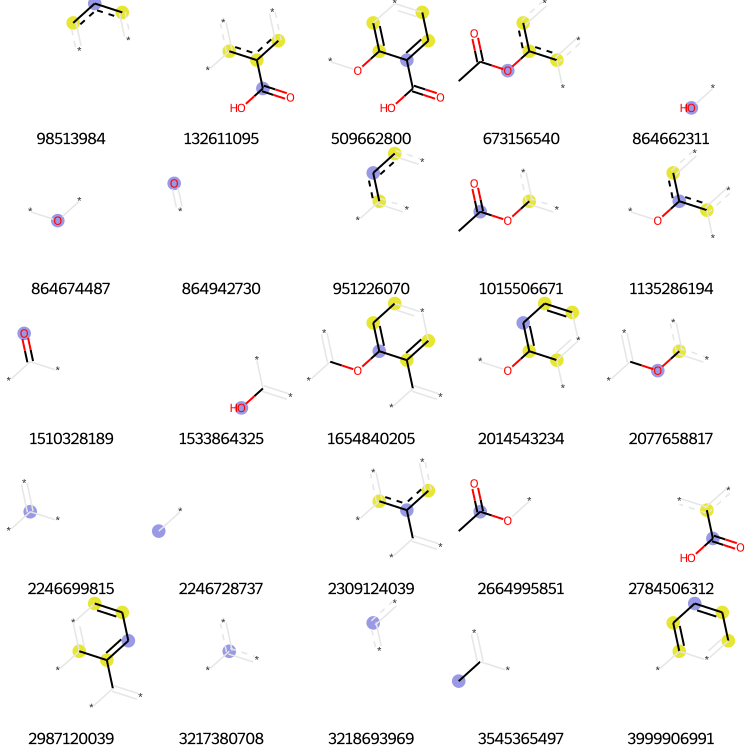

In [15]:
# prepare empty dictionary to store bit info
bit_dict = {}

# calculate ECFP with bit info stored
fp = AllChem.GetMorganFingerprint(mol, radius=2, bitInfo=bit_dict)
# prepare tuples for plotting
fp_tuples = [(mol, bit, bit_dict) for bit in list(bit_dict.keys())]

# check number of non-zero bits
print(f'Num. of non-zero bits: {len(bit_dict)}')

# draw all non-zero bits
label_list = list(map(str, list(bit_dict.keys()))) # convert int to str
DrawMorganBits(fp_tuples, molsPerRow=5, legends=label_list)


864662311を2048で割った余りを確認すると、長さを2048に固定した場合の807ビット目でビット衝突が起きていることがわかる。

In [16]:
# check reminder
bit_collide = 864662311 % 2048
print(f'Bit collision at {bit_collide}')


Bit collision at 807


### 演習6）カウント型のECFPフィンガープリントとアトムペアフィンガープリントを計算し，それぞれのベクトルの数値を可視化せよ．

XenonPyのカウント型ECFPを使用すると、807ビット目が1より大きいカウントを持つビットの一つであることが確認できる。

In [17]:
from xenonpy.descriptor import ECFP

fp_fcn = ECFP(radius=2, n_bits=2048, input_type='smiles', return_type='df', counting=True)
smis_list = ['CC(=O)Oc1ccccc1C(=O)O']
fp = fp_fcn.transform(smis_list)

# check ECFP bits that has counting greater than 1
bit_idx = fp.columns[(fp > 1).values.flatten()].values
bit_val = fp[bit_idx].values.flatten()
print('All bits with greater than 1 counts and the corresponding values:')
print(dict(zip(bit_idx, bit_val)))
      

All bits with greater than 1 counts and the corresponding values:
{'ecfp4_c:650': 2, 'ecfp4_c:807': 3, 'ecfp4_c:1088': 2, 'ecfp4_c:1199': 2, 'ecfp4_c:1380': 2, 'ecfp4_c:1750': 2, 'ecfp4_c:1873': 4, 'ecfp4_c:1917': 2}


分子内の各ビットの部分構造を強調表示する。

[実行に数分かかる。解像度を(200, 200)に下げると計算負荷が軽減される（テキストのフォントサイズもそれに合わせて小さくする必要がある）]

In [18]:
%%time

dir_save = 'output/演習6'
os.makedirs(dir_save, exist_ok=True)

# note that max. count = 4
n_Row, n_Col = 1, 4
n_S = n_Col*n_Row

mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O')
bit_dict = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bit_dict)

# set colors for highlights
atomColors = (0.6, 0.6, 0.9)
bondColors = (0.9, 0.9, 0.2)

# loop over all non-zero bits
for key, val in bit_dict.items():
    fig, ax = plt.subplots(n_Row, n_Col)
    _ = fig.set_size_inches(30, 30)
    _ = fig.set_tight_layout(True)
    
    # loop over each count of a non-zero bit
    for col, idx in enumerate(val):
        center = mol.GetAtomWithIdx(idx[0]).GetSymbol()
        radius = idx[1]
        
        # extract substructure bonds
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius+1, idx[0])
        sub_bonds = [mol.GetBondWithIdx(b).GetIdx() for b in env]
        # extract substructure atoms
        if radius > 0:
            env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, idx[0])
            amap = {}
            submol = Chem.PathToSubmol(mol, env, atomMap=amap)
            sub_atoms = list(amap.keys())
        else:
            sub_atoms = [idx[0]]
            
        # plot molecule with highlighted substructure
        try:
            img = Draw.MolToImage(mol, highlightAtoms=sub_atoms, highlightBonds=sub_bonds, size=(500, 500))
            _ = ax[col].clear()
            _ = ax[col].set_frame_on(False)
            _ = ax[col].imshow(img)
            _ = ax[col].text(1,10,f'Center atom: {center} (radius = {radius})', fontsize=32)
        except:
            pass
        _ = ax[col].set_axis_off()
        
    # make blank spaces
    for j in range(col, n_Col):
        _ = ax[j].set_axis_off()
        
    # save figure
    _ = fig.savefig(f'{dir_save}/bit_{key}.png',dpi = 500)
    _ = plt.close()


CPU times: user 1min 57s, sys: 4.51 s, total: 2min 1s
Wall time: 2min 2s


### 演習7）分子動力学シミュレーションのサンプルデータを用いて，モノマー構造のECFPフィンガープリント記述子から熱伝導率を予測するモデルを構築せよ．ここでは，ランダムフォレスト回帰とニューラルネットワークを用いる．また，訓練データの数やフィンガープリントの種類等を変更し，予測精度の変化を調べて解析結果をまとめよ．

物性データとECFPを作成する

In [19]:
dir_file = 'data/Book_data_MD.csv'
data = pd.read_csv(dir_file)

# extract column vector from DataFrame (cannot be row vector because of the scikit-learn update)
y_all = data['thermal_conductivity'].to_frame()


In [20]:
from xenonpy.descriptor import ECFP

fp_fcn = ECFP(radius=3, n_bits=2048, input_type='smiles', return_type='df')
x_all = fp_fcn.transform(data['SMILES'])

print(x_all)


     ecfp6:0  ecfp6:1  ecfp6:2  ecfp6:3  ecfp6:4  ecfp6:5  ecfp6:6  ecfp6:7  \
0          0        1        0        0        0        0        0        0   
1          0        1        0        0        0        0        0        0   
2          0        1        0        0        0        0        0        0   
3          0        1        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
295        0        1        0        0        0        0        0        0   
296        0        1        0        0        0        0        0        0   
297        1        1        0        0        0        0        0        0   
298        0        1        0        0        0        0        0        0   
299        0        0        0        0        0        0        0        0   

     ecfp6:8  ecfp6:9  ...  ecfp6:2038  ecfp6:2039 

scikit-learn splitter をベースとした XenonPy datatools を用いて、学習用とテスト用のデータを分割する。

In [21]:
from xenonpy.datatools import Splitter

# fixing random seed for reproducibility
random_seed = 202202

# split data into training (all) and test
sp_test = Splitter(len(y_all), test_size=0.2, random_state=random_seed)
x_train, x_test, y_train, y_test = sp_test.split(x_all, y_all)


XenonPy datatools を用いて、より良いモデル学習のために学習データに基づいたデータスケールを行います。

In [22]:
from xenonpy.datatools import Scaler

# set scaler parameters using training data only
y_scaler = Scaler().standard()
y_train_s = y_scaler.fit_transform(y_train)

# scale test data
y_test_s = y_scaler.transform(y_test)


ランダムフォレストモデルをハイパーパラメータチューニングで学習（グリッドサーチ）

[実行に1分程度かかる。］

In [23]:
%%time

from sklearn.ensemble import RandomForestRegressor as RFR 
from sklearn.model_selection import GridSearchCV

# hyperparameter grids
n_tree = [50, 100, 200]
max_feat_r = [0.1, 0.3, 0.5, 0.7]
max_feat = np.round([x*x_train.shape[1] for x in max_feat_r]).astype(int)

parameters = {'n_estimators': n_tree, 'max_features': max_feat}
mdl = GridSearchCV(RFR(), parameters, scoring='neg_mean_squared_error')
mdl.fit(x_train, y_train_s.values.flatten()) # requires 1D vector for model training

best_param = mdl.best_params_
print('Best parameter: {}'.format(best_param))


Best parameter: {'max_features': 1434, 'n_estimators': 200}
CPU times: user 30.2 s, sys: 210 ms, total: 30.4 s
Wall time: 31.6 s


予測結果のプロット用関数を用意する

In [24]:
import matplotlib.pyplot as plt

# x-axis: observation data, y-axis: prediction
def plot_prediction(x_tr, y_tr, x_te, y_te):
    xy_min = min(np.concatenate([x_tr, x_te, y_tr, y_te]))
    xy_max = max(np.concatenate([x_tr, x_te, y_tr, y_te]))
    xy_del = xy_max - xy_min
    
    _ = plt.figure(figsize=(5,5))
    _ = plt.scatter(x_tr, y_tr, s=20, c='b', alpha=0.15, label='Training')
    _ = plt.scatter(x_te, y_te, s=20, c='r', alpha=0.3, label='Test')
    _ = plt.rc('xtick',labelsize=14)
    _ = plt.rc('ytick',labelsize=14)
    _ = plt.ylabel('Prediction', fontsize=14)
    _ = plt.xlabel('Observation', fontsize=14)
    _ = plt.legend(fontsize=14)
    _ = plt.plot([xy_min,xy_max],[xy_min,xy_max],ls="--",c='k')
    _ = plt.show()
    

元のデータスケールで予測精度を確認する。

Training RMSE: 0.007982426275714978
Test RMSE: 0.02704726628593462
Training R2: 0.9434579478604491
Test R2: 0.47219685225382524


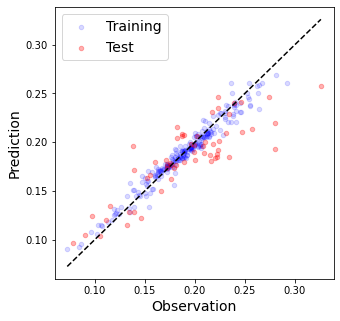

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

# make predictions for training and test data
prd_train = y_scaler.inverse_transform(mdl.predict(x_train).reshape(-1, 1)).flatten()
prd_test = y_scaler.inverse_transform(mdl.predict(x_test).reshape(-1, 1)).flatten()

# get performance statistics
RMSE_train = np.sqrt(mean_squared_error(prd_train, y_train.values.flatten()))
R2_train = r2_score(prd_train, y_train.values.flatten())
RMSE_test = np.sqrt(mean_squared_error(prd_test, y_test.values.flatten()))
R2_test = r2_score(prd_test, y_test.values.flatten())
print('Training RMSE: {}'.format(RMSE_train))
print('Test RMSE: {}'.format(RMSE_test))
print('Training R2: {}'.format(R2_train))
print('Test R2: {}'.format(R2_test))

# make plot
plot_prediction(y_train.values.flatten(), prd_train, y_test.values.flatten(), prd_test)


ハイパーパラメータチューニングによるニューラルネットワークモデルのトレーニング（グリッドサーチ - デモ用に少数の候補モデルでXenonPyショットガンアプローチを使用します。）

最適化パッケージ（例えばOptuna）は、ニューラルネットワークのハイパーパラメータチューニングに適していますが、トレーニングに長い時間がかかることに注意してください。

In [26]:
import numpy as np
from datetime import datetime
from collections import OrderedDict

from xenonpy.datatools import Splitter

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from xenonpy.utils import ParameterGenerator
from xenonpy.model import SequentialLinear
from xenonpy.model.training import Trainer, Checker, Adam, MSELoss
from xenonpy.model.training.dataset import ArrayDataset
from xenonpy.model.training.extension import TensorConverter, Validator, Persist
from xenonpy.model.utils import regression_metrics


In [27]:
# basic user parameters for training
cuda = 'cpu' # train with cpu (can use gpu instead if available)
epochs = 1000 # max number of training cycles
n_layers = (2, 3, 4) # list of random number of layers
n_models = 10 # total number of candidate models to train
working_dir = 'output/演習7/NN_mdls' # directory to save models


In [28]:
# split training data into actual training and validation sets
random_seed = 202202
sp_val = Splitter(len(y_train_s), test_size=0.2, random_state=random_seed)
x_tr, x_val, y_tr, y_val = sp_val.split(x_train, y_train_s)

# prepare data for training neural networks
train_dataset = DataLoader(ArrayDataset(x_tr, y_tr), shuffle=True, batch_size=len(y_tr))
val_dataset = DataLoader(ArrayDataset(x_val, y_val), batch_size=len(y_val)) 


In [29]:
# Prepare generator of neural network structure (use a pyramid shape structure of fully connected layers with random number of neurons)
generator = ParameterGenerator(
    in_features=x_tr.shape[1],
    out_features=1,
    h_neurons=dict(
        data=lambda n: sorted(np.random.uniform(0.2, 0.8, size=n), reverse=True), 
        repeat=n_layers
    ),
    h_dropouts=0.1,
    h_activation_funcs=(nn.LeakyReLU(),)
)

# Prepare trainer to train neural network automatically
trainer = Trainer(
    optimizer=Adam(lr=0.01),
    loss_func=MSELoss(),
    cuda=cuda,
    non_blocking=True
)
trainer.extend(
    TensorConverter(empty_cache=True),
    Validator(metrics_func=regression_metrics, early_stopping=50, trace_order=1, pearsonr=1.0, mse=0.0, r2=1.0, mae=0.0),
)


Trainer(cuda=device(type='cpu'), loss_func=MSELoss(), non_blocking=True)

[実行に数分かかる。]

In [30]:
%%time

np.random.seed(202202)

summary = [] # for saving training statistics

# train multiple candidate models
for idx, (paras, model) in enumerate(generator(n_models, factory=SequentialLinear)):
    # prepare information for track record
    model_name = f'model_{idx}'
    persist = Persist(
        f'{working_dir}/{model_name}', 
        # -^- required -^-

        # -v- optional -v-
        increment=False, 
        sync_training_step=True,
        model_class=SequentialLinear,
        model_params=paras,
    )
    _ = trainer.extend(persist)
    trainer.reset(to=model)

    # init training env
    training_env = {
        "start": datetime.utcnow().strftime('%Y/%m/%d %H:%M:%S.%f')[:-7],
        "finish": "",
        "device": cuda,
    }

    # training
    trainer.fit(training_dataset=train_dataset, validation_dataset=val_dataset, epochs=epochs)

    # update finish time
    training_env['finish'] = datetime.utcnow().strftime('%Y/%m/%d %H:%M:%S.%f')[:-7]

    # save additional info
    persist(training_indices=x_tr.index.tolist(), validation_indices=x_val.index.tolist(), 
            training_env=training_env, desc_names=x_tr.columns.values)  # <-- calling of this method only after the model training
    training_info = trainer.training_info

    # record statistics
    summary.append(OrderedDict(
        id=model_name,
        mae=training_info['val_mae'].min(),
        mse=training_info['val_mse'].min(),
        r2=training_info['val_r2'].max(),
        corr=training_info['val_pearsonr'].max(),
        training_env=training_env
    ))
    pd.DataFrame(summary).to_csv(f'{working_dir}/training_summary.csv')


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 431


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 328


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 109


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 90


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 169


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 109


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 100


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 237


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 105


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Early stopping is applied: no improvement for ['pearsonr', 'mse', 'r2', 'mae'] since the last 51 iterations, finish training at iteration 85
CPU times: user 6min 59s, sys: 1min 5s, total: 8min 4s
Wall time: 3min 55s


検証データに基づくモデルの選択とテストデータの予測精度を確認する。

Best model is model_9 (based on lowest validation MSE)
Training RMSE: 0.016698431296504283
Validation RMSE: 0.020745860143996805
Test RMSE: 0.02744662806373825
Training R2: 0.8559066757096379
Validation R2: 0.6088969708568563
Test R2: 0.45241855738248726


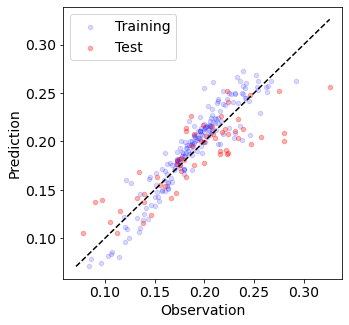

In [31]:
summary_train = pd.read_csv(f'{working_dir}/training_summary.csv', index_col=0)
idx_mdl = summary_train['id'].loc[summary_train['mse'].idxmin()]
print(f'Best model is {idx_mdl} (based on lowest validation MSE)')

# load model
trainer = Trainer.from_checker(Checker(f'{working_dir}/{idx_mdl}'))
trainer.reset(to='mse') # use best mse model checkpoint
    
# make predictions for training and test data and convert back to original scale
prd_tr = y_scaler.inverse_transform(trainer.predict(x_in=torch.tensor(x_tr.values, dtype=torch.float)).detach().numpy()).flatten()
prd_val = y_scaler.inverse_transform(trainer.predict(x_in=torch.tensor(x_val.values, dtype=torch.float)).detach().numpy()).flatten()
prd_test = y_scaler.inverse_transform(trainer.predict(x_in=torch.tensor(x_test.values, dtype=torch.float)).detach().numpy()).flatten()

# get performance statistics
y_tr_norm = y_train.loc[y_tr.index].values.flatten()
y_val_norm = y_train.loc[y_val.index].values.flatten()
RMSE_train = np.sqrt(mean_squared_error(prd_tr, y_tr_norm))
R2_train = r2_score(prd_tr, y_tr_norm)
RMSE_val = np.sqrt(mean_squared_error(prd_val, y_val_norm))
R2_val = r2_score(prd_val, y_val_norm)
RMSE_test = np.sqrt(mean_squared_error(prd_test, y_test.values.flatten()))
R2_test = r2_score(prd_test, y_test.values.flatten())
print('Training RMSE: {}'.format(RMSE_train))
print('Validation RMSE: {}'.format(RMSE_val))
print('Test RMSE: {}'.format(RMSE_test))
print('Training R2: {}'.format(R2_train))
print('Validation R2: {}'.format(R2_val))
print('Test R2: {}'.format(R2_test))

# make plot
plot_prediction(y_tr_norm, prd_tr, y_test.values.flatten(), prd_test)


異なるフィンガープリントを用意する。

In [32]:
%%time

from xenonpy.descriptor import ECFP, AtomPairFP

x_dict = {}

# ECFP - binary, radius 1
fp_fcn = ECFP(radius=1, n_bits=2048, input_type='smiles', return_type='df')
x_dict['ECFP2_b'] = fp_fcn.transform(data['SMILES'])

# ECFP - binary, radius 3
fp_fcn = ECFP(radius=3, n_bits=2048, input_type='smiles', return_type='df')
x_dict['ECFP6_b'] = fp_fcn.transform(data['SMILES'])

# ECFP - counting, radius 3
fp_fcn = ECFP(radius=3, n_bits=2048, input_type='smiles', return_type='df', counting=True)
x_dict['ECFP6_c'] = fp_fcn.transform(data['SMILES'])

# AtomPairFP - binary
fp_fcn = AtomPairFP(n_bits=2048, input_type='smiles', return_type='df')
x_dict['APFP_b'] = fp_fcn.transform(data['SMILES'])

# AtomPairFP - counting
fp_fcn = AtomPairFP(n_bits=2048, input_type='smiles', return_type='df', counting = True)
x_dict['APFP_c'] = fp_fcn.transform(data['SMILES'])

# MACCS - binary
fp_fcn = AtomPairFP(input_type='smiles', return_type='df')
x_dict['MACCS_b'] = fp_fcn.transform(data['SMILES'])


CPU times: user 1.2 s, sys: 76.5 ms, total: 1.28 s
Wall time: 1.5 s


異なる数の学習データを用意する。

In [33]:
N_ratio = np.array([0.3, 0.5, 0.8, 1])
N_dat = np.round(N_ratio*len(y_train)).astype(int)


異なるフィンガープリントと異なる数の学習データでランダムフォレストを再訓練し、予測精度を確認する。

[実行に10分以上かかる]

In [34]:
%%time

# prepare to save statistics of prediction performance
RMSE_RF_train = pd.DataFrame(index=N_dat, columns=x_dict.keys())
RMSE_RF_test = pd.DataFrame(index=N_dat, columns=x_dict.keys())
R2_RF_train = pd.DataFrame(index=N_dat, columns=x_dict.keys())
R2_RF_test = pd.DataFrame(index=N_dat, columns=x_dict.keys())

# hyperparameter grids
n_tree = [50, 100, 200]
max_feat_r = [0.1, 0.3, 0.5, 0.7]

dir_out = 'output/演習7/RF_performance'
os.makedirs(dir_out, exist_ok=True)

# loop over different fingerprints
for fp, x_all in x_dict.items():
    x_train_all, x_test, y_train_all, y_test = sp_test.split(x_all, y_all)

    # loop over different number of training data
    for idx_t in N_dat:
        x_train = x_train_all.iloc[:idx_t, :]
        y_train = y_train_all.iloc[:idx_t, :]
        
        # set scaler parameters using training data only
        y_scaler = Scaler().standard()
        y_train_s = y_scaler.fit_transform(y_train)
        y_test_s = y_scaler.transform(y_test)
        
        # train model with hyperparameter tuning
        max_feat = np.round([x*x_train.shape[1] for x in max_feat_r]).astype(int)
        parameters = {'n_estimators': n_tree, 'max_features': max_feat}
        mdl = GridSearchCV(RFR(), parameters, scoring='neg_mean_squared_error')
        mdl.fit(x_train, y_train_s.values.flatten()) # requires 1D vector for model training

        prd_train = y_scaler.inverse_transform(mdl.predict(x_train).reshape(-1,1)).flatten()
        prd_test = y_scaler.inverse_transform(mdl.predict(x_test).reshape(-1,1)).flatten()

        # get performance statistics
        RMSE_RF_train.loc[idx_t, fp] = np.sqrt(mean_squared_error(prd_train, y_train.values.flatten()))
        R2_RF_train.loc[idx_t, fp] = r2_score(prd_train, y_train.values.flatten())
        RMSE_RF_test.loc[idx_t, fp] = np.sqrt(mean_squared_error(prd_test, y_test.values.flatten()))
        R2_RF_test.loc[idx_t, fp] = r2_score(prd_test, y_test.values.flatten())
        
# save the performance results
RMSE_RF_train.to_csv(f'{dir_out}/RMSE_train.csv')
RMSE_RF_test.to_csv(f'{dir_out}/RMSE_test.csv')
R2_RF_train.to_csv(f'{dir_out}/R2_train.csv')
R2_RF_test.to_csv(f'{dir_out}/R2_test.csv')


CPU times: user 7min 13s, sys: 2.86 s, total: 7min 16s
Wall time: 7min 17s


同様の計算をニューラルネットワークモデルに対して再度行うことができる。一般に、フィンガープリントの種類や訓練データの数に関係なく、訓練データに対する性能は常に良好であることが分かる。しかしながら、より多くの訓練データがあれば、一般的にテストデータの予測精度の向上が期待される。さらに、カウント型のフィンガープリントは、バイナリ型のフィンガープリントより多くの情報が含まれるので、より優れた予測性能を可能にする。

### 演習8）ポリエチレン*CCC(=O)O*の単量体，二量体，三量体のSMILES文字列を生成し．ECFP記述子を計算せよ（B=2048,R=2）．

In [35]:
import numpy as np
import rdkit 
from rdkit import Chem
from rdkit.Chem import AllChem, Draw


複数のモノマーを接続する機能を用意する（この機能ではリングを持つモノマーは扱えない）

In [36]:
def polymer_chain(smi, num,max_iter=100):
    mol = Chem.MolFromSmiles(smi)
    
    for _ in range(max_iter):
        rnd = np.random.randint(0, mol.GetNumAtoms())
        rsmi = Chem.MolToSmiles(mol, rootedAtAtom=rnd)
        if  rsmi[0] == "*":
            smi = rsmi
            break
            
    for _ in range(num):
        smi = "*" + smi[1:].replace("*", rsmi[1:])
            
    return smi


さまざまなSMILESのECFPを計算する。

Num. of non-zero bits: [16, 22, 22]


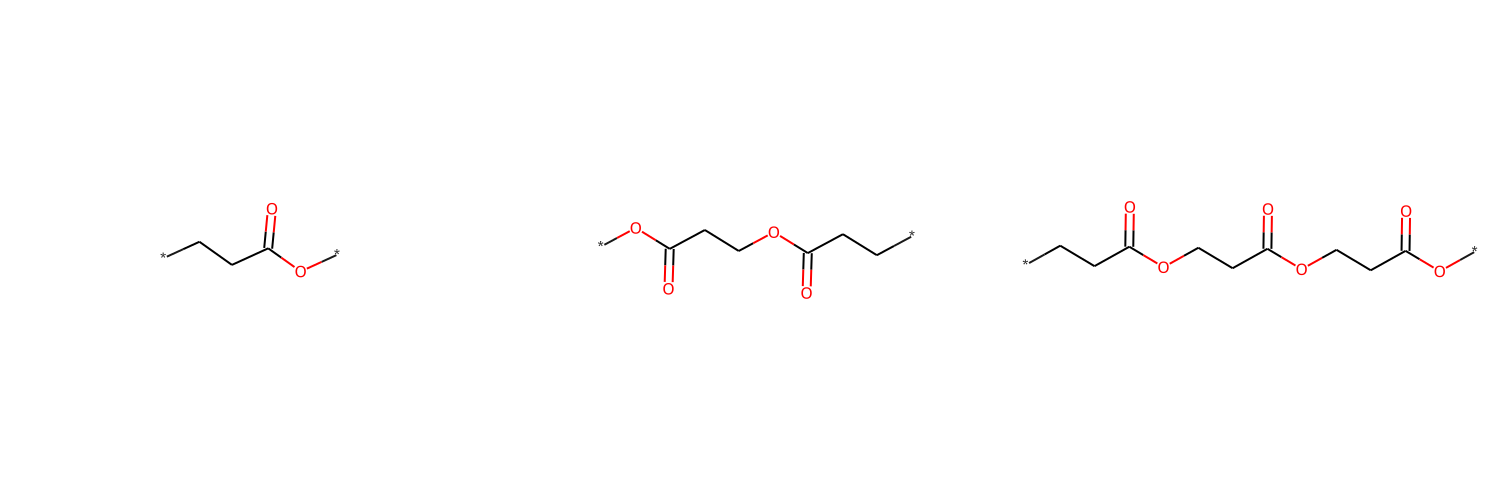

In [37]:
smi = '*CCC(=O)O*'
mols = []
fps = []
bit_dicts = []
for n in range(3):
    s = polymer_chain(smi, n)
    mols.append(Chem.MolFromSmiles(s))
    bit_dicts.append({})
    fps.append(AllChem.GetMorganFingerprintAsBitVect(mols[-1], radius=2, nBits=2048, useFeatures=False, bitInfo=bit_dicts[-1]))
    
print(f'Num. of non-zero bits: {[len(x) for x in bit_dicts]}')
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(500,500))


### 演習9）演習8の各ビットの部分構造を描画し，比較せよ．

Mer


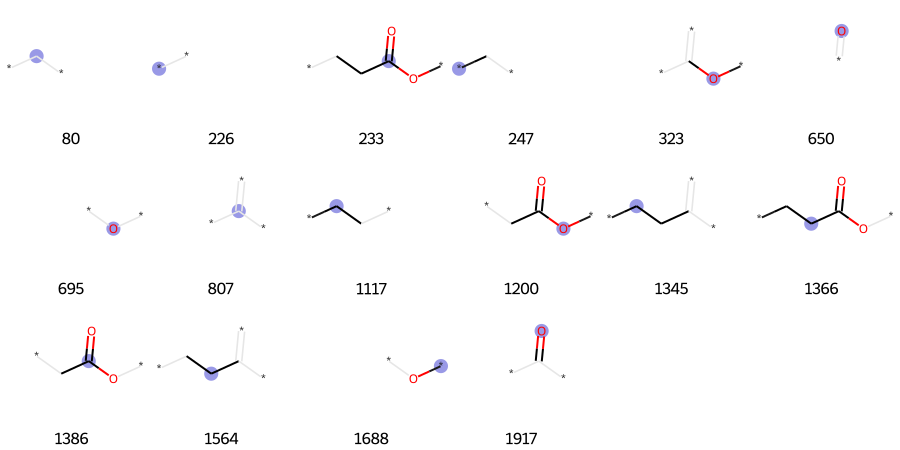

In [38]:
from rdkit.Chem.Draw import DrawMorganBits

mol = mols[0]
bit_dict = bit_dicts[0]
fp_tuples = [(mol, bit, bit_dict) for bit in list(bit_dict.keys())]
label_list = list(map(str, list(bit_dict.keys()))) # convert int to str

print('Mer')
DrawMorganBits(fp_tuples, molsPerRow=6, legends=label_list)


Dimer


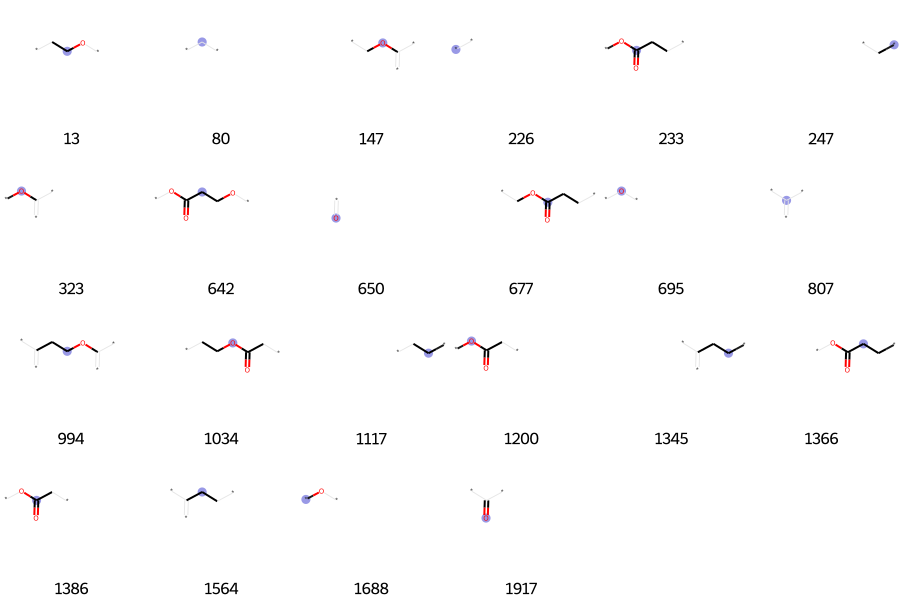

In [39]:
mol = mols[1]
bit_dict = bit_dicts[1]
fp_tuples = [(mol, bit, bit_dict) for bit in list(bit_dict.keys())]
label_list = list(map(str, list(bit_dict.keys()))) # convert int to str

print('Dimer')
DrawMorganBits(fp_tuples, molsPerRow=6, legends=label_list)


Trimer


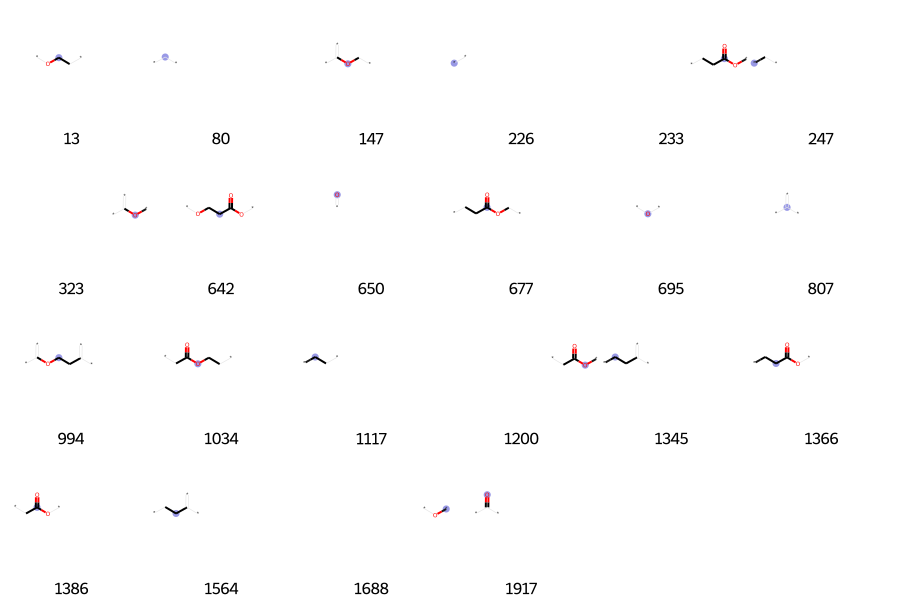

In [40]:
mol = mols[2]
bit_dict = bit_dicts[2]
fp_tuples = [(mol, bit, bit_dict) for bit in list(bit_dict.keys())]
label_list = list(map(str, list(bit_dict.keys()))) # convert int to str

print('Trimer')
DrawMorganBits(fp_tuples, molsPerRow=6, legends=label_list)


### 演習10）サンプルデータの10化合物のRDKitの2次元記述子とmordredの2次元記述子を計算せよ．


In [41]:
import pandas as pd

# set file directory
dir_file = 'data/Book_data_MD.csv'
# load csv data using pandas DataFrame
data = pd.read_csv(dir_file)


注意：モノマーSMILESに'*'を付けて使用すると、一部の物理記述子の計算に失敗することがある。

In [42]:
from xenonpy.descriptor import DescriptorFeature

fp_fcn = DescriptorFeature(input_type='smiles', return_type='df', add_Hs=True)
fp_rdkit = fp_fcn.transform(data['SMILES'])

# descriptors with NA values
fp_rdkit.columns[fp_rdkit.isna().sum() > 0]


Index(['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW'],
      dtype='object')

注意：MordredはXenonPyのインストール時にデフォルトでインストールされるパッケージではない可能性があるので、自分でインストールするようにしてください。その後、我々のコントリビューターによって書かれたモジュール（非公式モジュール）を使用して、直接2Dディスクリプタを計算することができる。

In [43]:
from xenonpy.contrib.extend_descriptors.descriptor import Mordred2DDescriptor

fp_fcn = Mordred2DDescriptor(return_type='df')
fp_mordred = fp_fcn.transform(data['SMILES'])


  4%|█▌                                        | 11/300 [00:02<00:56,  5.11it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 13%|█████▍                                    | 39/300 [00:03<00:11, 22.46it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 37%|███████████████▏                         | 111/300 [00:05<00:06, 30.57it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 47%|███████████████████▍                     | 142/300 [00:05<00:04, 37.90it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 73%|█████████████████████████████▉           | 219/300 [00:07<00:01, 42.75it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 90%|████████████████████████████████████▊    | 269/300 [00:09<00:00, 34.53it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|█████████████████████████████████████████| 300/300 [00:09<00:00, 31.70it/s]

/Users/stephenwu/opt/miniconda3/envs/iMacHome_xepy38_working/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
